## Initialization

### imports

Data download related

In [ ]:
import os
from os import path   # system path
from os import mkdir  # create a directory
from glob import glob # query folders
import requests       # download
import zipfile        # extract zip files
from tqdm import tqdm # progress bar

Data manipulation

In [ ]:
import geopandas as gpd # geo Pandas
import pandas as pd # Pandas
import matplotlib.pyplot as plt # to make graphs
import random # random
from shapely.geometry import Point, Polygon, MultiPolygon, LineString, MultiLineString # Funzione per generare punti casuali all'interno di un poligono # to deal with geometries

### data

In [ ]:
COLAB = None
try:
    # only for google drive linking (on Colab)
    from google.colab import drive
    # Link Google Drive account to use relative pathnames
    drive.mount("/content/gdrive", readonly = False)
    COLAB = True
except:
    COLAB = False
print("Notbook is running in Colab environment:", COLAB)

Mounted at /content/gdrive
Notbook is running in Colab environment: True


In [ ]:
CSV_AND_JSON_FOLDER = "/content/gdrive/MyDrive/Data Science/smart cities/CSVs and JSONs from notebooks" # Edo Colab
#CSV_AND_JSON_FOLDER = "/content/gdrive/MyDrive/smart cities/CSVs and JSONs from notebooks" # Davide Colab

In [ ]:
# Elenca tutti i file nella cartella
files = os.listdir(CSV_AND_JSON_FOLDER)

# Filtra solo i file CSV
csv_files = [f for f in files if f.endswith('csv')]

# Crea due dizionari per memorizzare i DataFrame
pd_dataframes = {}
gpd_dataframes = {}

# Leggi ogni file CSV in un DataFrame
for csv_file in csv_files:
    file_path = os.path.join(CSV_AND_JSON_FOLDER, csv_file)
    pd_dataframes[csv_file] = pd.read_csv(file_path)
    print(f"Imported {csv_file}")

# Filtra solo i file CSV
json_files = [f for f in files if f.endswith('json')]

# Leggi ogni file CSV in un DataFrame
for json_file in json_files:
    file_path = os.path.join(CSV_AND_JSON_FOLDER, json_file)
    gpd_dataframes[json_file] = gpd.read_file(file_path)
    print(f"Imported {json_file}")

Imported green_divided_in_areas.csv
Imported air_milano.csv
Imported air_sc.csv
Imported buildings_divided_in_areas.csv
Imported green_points.json
Imported comune.json
Imported sc_stations.json
Imported stations_milano.json
Imported osm_milano_natural.json
Imported osm_milano_buildings.json
Imported osm_milano_streets.json


In [ ]:
comune = gpd_dataframes['comune.json']
comune.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,dataset,entity,source,geometry
0,1,1,1,0,201,1001,001001,Agliè,0,0,18035.254001,1.314626e+07,comune,territory,istat,"POLYGON ((404703.561 5026682.656, 404733.562 5..."
1,1,1,1,0,201,1002,001002,Airasca,0,0,18408.906988,1.573931e+07,comune,territory,istat,"POLYGON ((380700.909 4977305.520, 380702.627 4..."
2,1,1,1,0,201,1003,001003,Ala di Stura,0,0,31834.156081,4.633156e+07,comune,territory,istat,"POLYGON ((364710.856 5022090.677, 364725.872 5..."
3,1,1,1,0,201,1004,001004,Albiano d'Ivrea,0,0,18927.262827,1.173969e+07,comune,territory,istat,"POLYGON ((415942.510 5033304.612, 415962.885 5..."
4,1,1,1,0,201,1006,001006,Almese,0,0,17057.413964,1.787412e+07,comune,territory,istat,"POLYGON ((376934.550 4999073.855, 376941.551 4..."


In [ ]:
stations_milano = gpd_dataframes['stations_milano.json']
stations_milano.head()

,id,name,id_arpa,inizio_operativita,fine_operativita,inquinanti,dataset,entity,source,color,geometry
0,1,p.le Abbiategrasso,126,1900-01-01,2017-08-31,NO2,stations_milano,station,milano,blue,POINT (514250.965 5030991.481)
1,2,via Pascal *,100,1900-01-01,2099-12-31,"NO2, SO2, PM25, SO2, O3, PM10, C6H6",stations_milano,station,milano,blue,POINT (518351.042 5035645.702)
2,3,viale Liguria,107,1900-01-01,2099-12-31,"NO2, CO_8h",stations_milano,station,milano,blue,POINT (513250.896 5032311.124)
3,4,viale Marche,2,1900-01-01,2099-12-31,"C6H6, CO_8h, PM25, PM10, NO2",stations_milano,station,milano,blue,POINT (514910.677 5038103.127)
4,5,Parco Lambro,124,1900-01-01,2017-08-31,"NO2, O3",stations_milano,station,milano,blue,POINT (519320.905 5038481.745)


In [ ]:
sc_stations = gpd_dataframes['sc_stations.json']
sc_stations.head()

,id,name,Latitude,Longitude,dataset,entity,source,color,geometry
0,#44216,Centro,45.4617222,9.182333333333332,sc_chosen_stations,station_sc,sensor community,red,POINT (514254.769 5034260.134)
1,#40256,Porta Vittoria,45.462109495758476,9.209781789416478,sc_chosen_stations,station_sc,sensor community,red,POINT (516400.569 5034308.395)
2,#32399,Via Meda,45.43998127831078,9.178070145718733,sc_chosen_stations,station_sc,sensor community,red,POINT (513926.824 5031844.054)
3,#70169,Lodi,45.442101399035224,9.21225714798778,sc_chosen_stations,station_sc,sensor community,red,POINT (516599.959 5032086.080)
4,#50128,Piazza Leonardo,45.47777813047526,9.224090852257673,sc_chosen_stations,station_sc,sensor community,red,POINT (517514.386 5036052.144)


In [ ]:
osm_milano_natural = gpd_dataframes['osm_milano_natural.json']
osm_milano_natural.head()

,visible,version,tags,lon,lat,id,changeset,timestamp,natural,wetland,osm_type,water,dataset,entity,source,color,geometry
0,0,6,"{'ele': '185', 'height': '50', 'name': 'Monte ...",9.134479,45.490875,461715328,0.0,1696267867,peak,None,node,None,osm_milano_natural,natural,osm,forestgreen,POINT (510508.077 5037491.566)
1,0,3,"{'leaf_type': 'broadleaved', 'species': 'Magno...",9.203583,45.464874,761247282,0.0,1408036318,tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,POINT (515915.156 5034614.305)
2,0,1,None,9.154628,45.437714,935465497,0.0,1286042622,tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,POINT (512093.888 5031588.334)
3,0,1,None,9.154697,45.437599,935465525,0.0,1286042622,tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,POINT (512099.357 5031575.631)
4,0,1,None,9.153111,45.437283,935465528,0.0,1286042622,tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,POINT (511975.307 5031540.218)


In [ ]:
milano = comune[comune["COMUNE"] == "Milano"].geometry.iloc[0]

### functions

In [ ]:
def gdf_merge(gdfs):
  gdf_ref = gdfs[0]
  return pd.concat(
    [gdf.to_crs(gdf_ref.crs) for gdf in gdfs],
    ignore_index=True,
  )

In [ ]:
def gplot_milano(gdf, column = "dataset", **kwargs):
  if (type(gdf) is list):
    return gplot_milano(gdf_merge(gdf), column = column, **kwargs)
  plot_gdf = gpd.GeoDataFrame(
    pd.concat([
      comune[comune["COMUNE"] == "Milano"],
      gdf.to_crs(comune.crs),
    ], ignore_index=True),
    crs=comune.crs,
  )
  return plot_gdf.plot(column = column, **kwargs)

# Data Augmentation

,id,name,geometry,dataset,latitudine,longitudine
0,#44216,Centro,POINT (514254.769 5034260.134),sc_chosen_stations,5.034260e+06,514254.768800
1,#40256,Porta Vittoria,POINT (516400.569 5034308.395),sc_chosen_stations,5.034308e+06,516400.568968
2,#32399,Via Meda,POINT (513926.824 5031844.054),sc_chosen_stations,5.031844e+06,513926.823619
3,#70169,Lodi,POINT (516599.959 5032086.080),sc_chosen_stations,5.032086e+06,516599.959025
4,#50128,Piazza Leonardo,POINT (517514.386 5036052.144),sc_chosen_stations,5.036052e+06,517514.386254
5,#32393,Via Ripamonti Fine,POINT (516145.039 5030310.204),sc_chosen_stations,5.030310e+06,516145.039236
6,#22851,Forlanini,POINT (518761.742 5034068.738),sc_chosen_stations,5.034069e+06,518761.742008
7,#24644,Villapizzone,POINT (511392.183 5038741.671),sc_chosen_stations,5.038742e+06,511392.183023
8,2,via Pascal *,POINT (518351.042 5035645.702),stations_milano,5.035646e+06,518351.042247
9,3,viale Liguria,POINT (513250.896 5032311.124),stations_milano,5.032311e+06,513250.895801


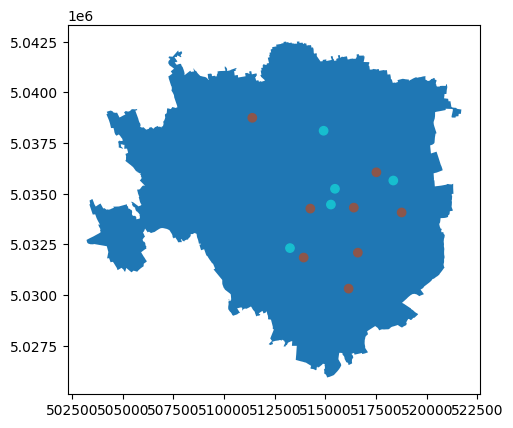

In [ ]:
# aggiunte colonne id (necessaria per fare il join con i dati di rilevazione dell'aria) e dataset (per i plot)
sc_stations_filtered = sc_stations[['id', 'name', 'geometry', 'dataset']]
# eliminate le stazioni che non coprono il 2023, anno su cui abbiamo i dati delle rilevazioni
stations_milano_filtered = stations_milano[(stations_milano['inizio_operativita'] < '2023-01-01') & (stations_milano['fine_operativita'] >= '2024-01-01')]
stations_milano_filtered = stations_milano_filtered[['id', 'name', 'geometry', 'dataset']]

concatenated_stations = gdf_merge([sc_stations_filtered, stations_milano_filtered])

concatenated_stations['latitudine'] = concatenated_stations.geometry.y
concatenated_stations['longitudine'] = concatenated_stations.geometry.x

gplot_milano(concatenated_stations)
concatenated_stations

In [ ]:
# Conta i valori unici nella colonna 'natural'
natural_counts = osm_milano_natural['natural'].value_counts()

# Stampa i risultati
print(natural_counts)

natural
tree          19142
tree_row       2619
grassland      1070
wood            266
scrub           147
water           146
shrub            23
shrubbery        13
stone             9
wetland           3
tree_group        3
heath             3
peak              2
rock              2
spring            2
bare_rock         1
tree_stump        1
sand              1
hill              1
beach             1
forest            1
Name: count, dtype: int64


<Axes: >

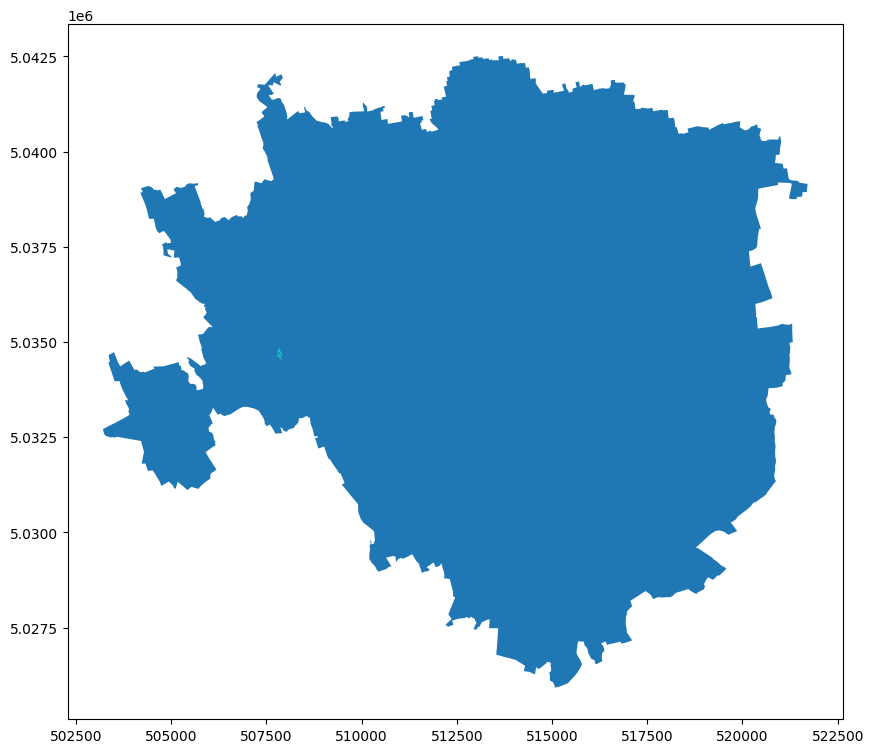

In [ ]:
gplot_milano(osm_milano_natural[osm_milano_natural['natural'].isin(['wetland'])], figsize=(10,10), markersize=0.01)

<Axes: >

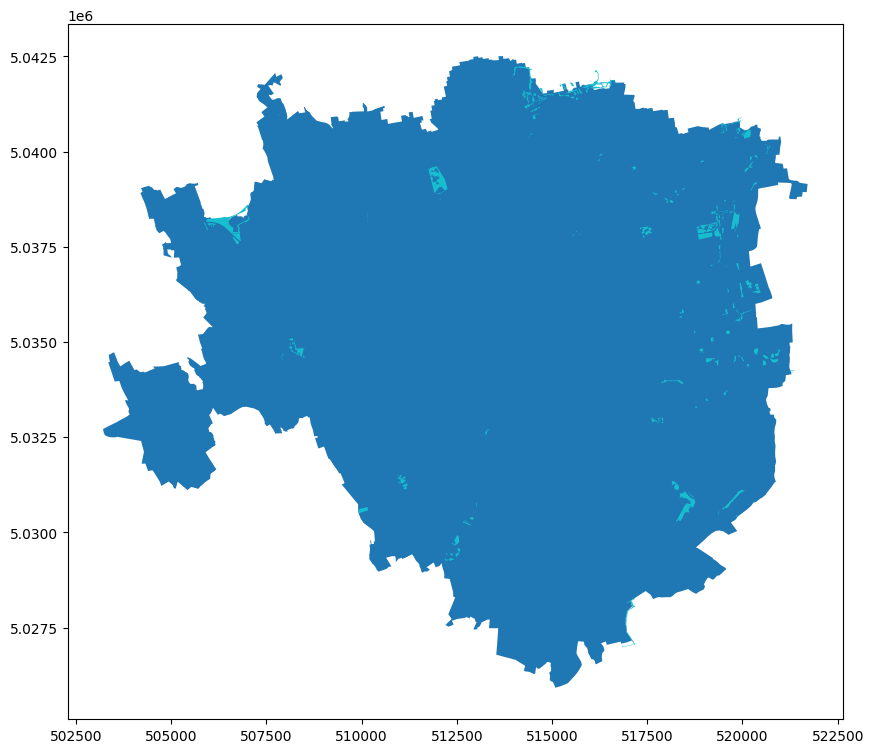

In [ ]:
gplot_milano(osm_milano_natural[osm_milano_natural['natural'].isin(['wood'])], figsize=(10,10), markersize=0.01)

<Axes: >

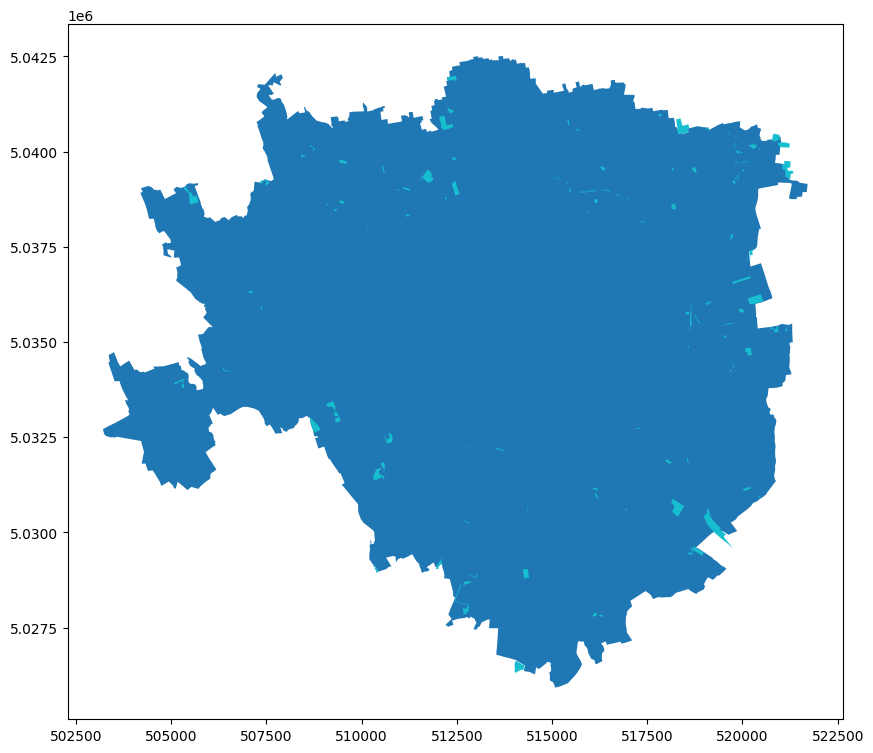

In [ ]:
gplot_milano(osm_milano_natural[osm_milano_natural['natural'].isin(['scrub'])], figsize=(10,10), markersize=0.01)

<Axes: >

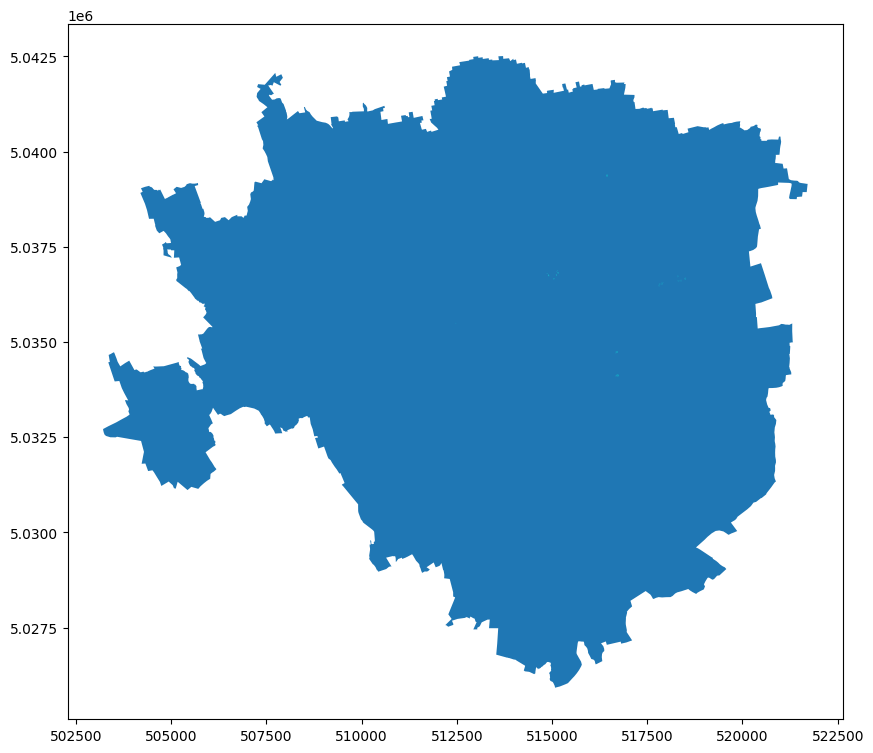

In [ ]:
gplot_milano(osm_milano_natural[osm_milano_natural['natural'].isin(['shrub', 'shrubbery'])], figsize=(10,10), markersize=0.01)

<Axes: >

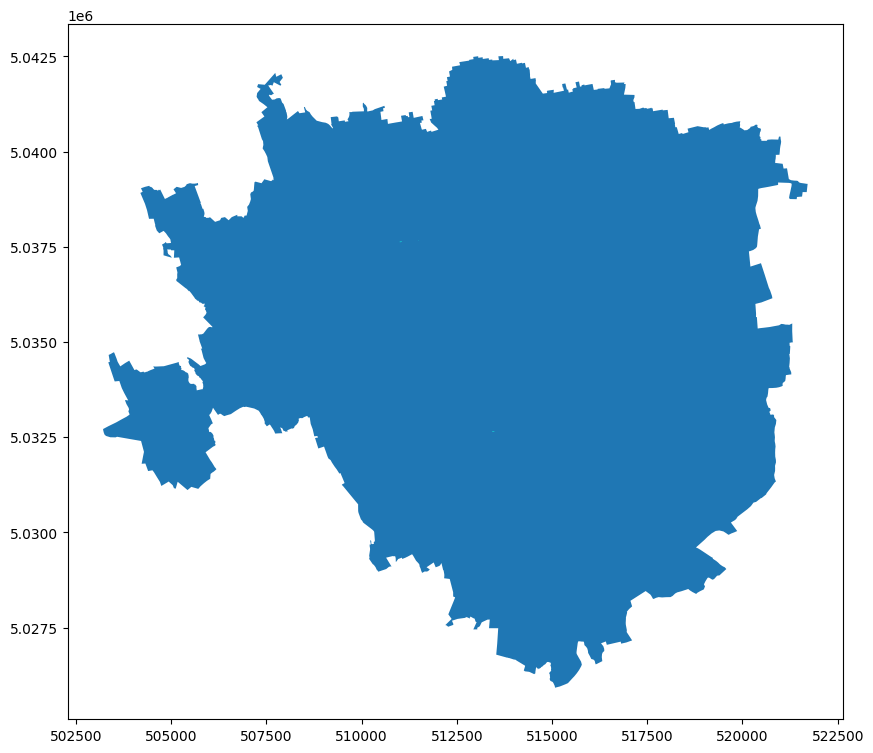

In [ ]:
gplot_milano(osm_milano_natural[osm_milano_natural['natural'].isin(['tree_group'])], figsize=(10,10), markersize=0.01)

<Axes: >

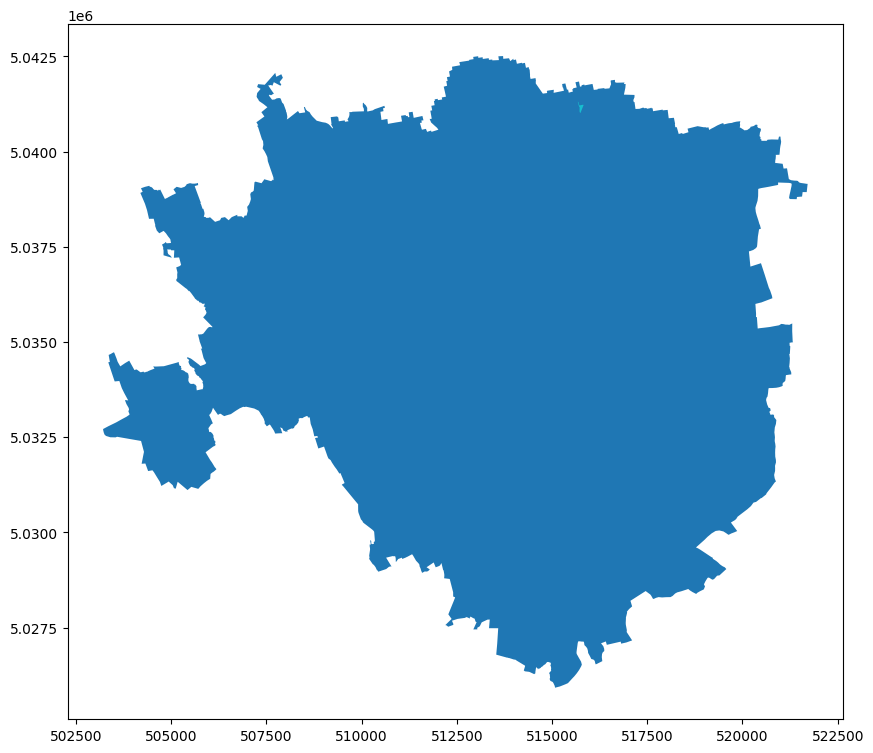

In [ ]:
gplot_milano(osm_milano_natural[osm_milano_natural['natural'].isin(['forest'])], figsize=(10,10), markersize=0.01)

,natural,lon,lat,geometry,dataset
1,tree,9.203583,45.464874,POINT (515915.156 5034614.305),osm_milano_natural
2,tree,9.154628,45.437714,POINT (512093.888 5031588.334),osm_milano_natural
3,tree,9.154697,45.437599,POINT (512099.357 5031575.631),osm_milano_natural
4,tree,9.153111,45.437283,POINT (511975.307 5031540.218),osm_milano_natural
5,tree,9.154371,45.437309,POINT (512073.909 5031543.373),osm_milano_natural
...,...,...,...,...,...
19178,tree,9.167059,45.518223,POINT (513047.570 5040534.580),osm_milano_natural
19179,tree,9.167052,45.518276,POINT (513047.036 5040540.512),osm_milano_natural
19180,tree,9.166985,45.518276,POINT (513041.748 5040540.501),osm_milano_natural
19181,tree,9.166988,45.518219,POINT (513042.059 5040534.145),osm_milano_natural


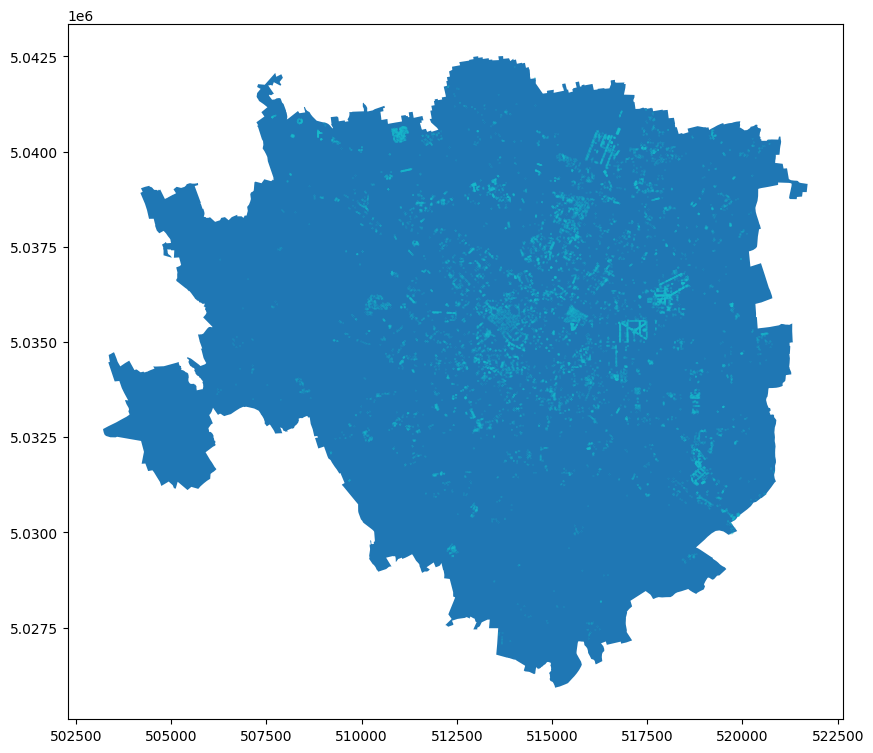

In [ ]:
# Definisci i valori che vuoi mantenere
natural_in_point_format = ['tree', 'shrub']

# Filtra il dataset
trees_and_shrubs = osm_milano_natural[osm_milano_natural['natural'].isin(natural_in_point_format)]
trees_and_shrubs = trees_and_shrubs[['natural', 'lon', 'lat', 'geometry', 'dataset']]
gplot_milano(trees_and_shrubs, figsize=(10,10), markersize=0.01)
trees_and_shrubs

In [ ]:
osm_milano_natural[osm_milano_natural.geometry.area != 0].geometry.area.quantile(0.02)

15.529495699158103

In [ ]:
tree_rows = osm_milano_natural[osm_milano_natural['natural'] == 'tree_row']
woods = osm_milano_natural[osm_milano_natural['natural'] == 'wood']
grasslands = osm_milano_natural[osm_milano_natural['natural'] == 'grassland']
forests = osm_milano_natural[osm_milano_natural['natural'] == 'forest']
scrubs = osm_milano_natural[osm_milano_natural['natural'] == 'scrub']
tree_groups = osm_milano_natural[osm_milano_natural['natural'] == 'tree_group']
wetlands = osm_milano_natural[osm_milano_natural['natural'] == 'wetland']

tree_rows = tree_rows    [['natural', 'lat', 'lon', 'geometry', 'dataset']]
woods = woods            [['natural', 'lat', 'lon', 'geometry', 'dataset']]
grasslands = grasslands  [['natural', 'lat', 'lon', 'geometry', 'dataset']]
forests = forests        [['natural', 'lat', 'lon', 'geometry', 'dataset']]
scrubs = scrubs          [['natural', 'lat', 'lon', 'geometry', 'dataset']]
tree_groups = tree_groups[['natural', 'lat', 'lon', 'geometry', 'dataset']]
wetlands = wetlands      [['natural', 'lat', 'lon', 'geometry', 'dataset']]

# Funzione per ottenere i tipi di geometria e contarli
def get_geometry_types(df):
    return df['geometry'].apply(lambda x: x.geom_type).value_counts()

geometry_types_tree_rows = get_geometry_types(tree_rows)
geometry_types_woods = get_geometry_types(woods)
geometry_types_grasslands = get_geometry_types(grasslands)
geometry_types_forests = get_geometry_types(forests)
geometry_types_scrubs = get_geometry_types(scrubs)
geometry_types_tree_groups = get_geometry_types(tree_groups)
geometry_types_wetlands = get_geometry_types(wetlands)

print("Tipi di geometria per 'tree_row':")
print(geometry_types_tree_rows)
print("\nTipi di geometria per 'grassland':")
print(geometry_types_grasslands)
print("\nTipi di geometria per 'wood':")
print(geometry_types_woods)
print("\nTipi di geometria per 'forest':")
print(geometry_types_forests)
print("\nTipi di geometria per 'scrub':")
print(geometry_types_scrubs)
print("\nTipi di geometria per 'tree_group':")
print(geometry_types_tree_groups)
print("\nTipi di geometria per 'wetland':")
print(geometry_types_wetlands)

Tipi di geometria per 'tree_row':
geometry
LineString         1882
MultiLineString     697
Polygon              40
Name: count, dtype: int64

Tipi di geometria per 'grassland':
geometry
Polygon         1054
MultiPolygon      16
Name: count, dtype: int64

Tipi di geometria per 'wood':
geometry
Polygon         254
MultiPolygon     12
Name: count, dtype: int64

Tipi di geometria per 'forest':
geometry
Polygon    1
Name: count, dtype: int64

Tipi di geometria per 'scrub':
geometry
Polygon         143
MultiPolygon      4
Name: count, dtype: int64

Tipi di geometria per 'tree_group':
geometry
Polygon    3
Name: count, dtype: int64

Tipi di geometria per 'wetland':
geometry
Point      2
Polygon    1
Name: count, dtype: int64


In [ ]:
# Funzione per generare punti casuali all'interno di un poligono
def random_points_in_polygon(polygon, num_points):
    min_x, min_y, max_x, max_y = polygon.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(random_point):
            points.append(random_point)
    return points

# Funzione per generare punti casuali lungo una linea
def random_points_in_linestring(linestring, num_points):
    points = []
    total_length = linestring.length
    for _ in range(num_points):
        random_distance = random.uniform(0, total_length)
        point = linestring.interpolate(random_distance)
        points.append(point)
    return points

# Funzione per generare punti in base all'area dei poligoni
def generate_points(df, points_per_sqm=1/15, points_per_meter=1/15):
    points = []
    indices = []

    for idx, row in df.iterrows():
        if row['geometry'].geom_type == 'Polygon':
            area_sqm = row['geometry'].area # * 1e6  # Convertire km^2 in m^2
            num_points = max(int(area_sqm * points_per_sqm), 1)
            points.extend(random_points_in_polygon(row['geometry'], num_points))
            indices.extend([idx] * num_points)
        elif row['geometry'].geom_type == 'MultiPolygon':
            for polygon in row['geometry'].geoms:
                area_sqm = polygon.area # * 1e6  # Convertire km^2 in m^2
                num_points = max(int(area_sqm * points_per_sqm), 1)
                points.extend(random_points_in_polygon(polygon, num_points))
                indices.extend([idx] * num_points)
        elif row['geometry'].geom_type == 'LineString':
            length_m = row['geometry'].length # * 1000  # Convertire km in m
            num_points = max(int(length_m * points_per_meter), 1)
            points.extend(random_points_in_linestring(row['geometry'], num_points))
            indices.extend([idx] * num_points)
        elif row['geometry'].geom_type == 'MultiLineString':
            for linestring in row['geometry'].geoms:
                length_m = linestring.length # * 1000  # Convertire km in m
                num_points = max(int(length_m * points_per_meter), 1)
                points.extend(random_points_in_linestring(linestring, num_points))
                indices.extend([idx] * num_points)
        elif row['geometry'].geom_type == 'Point':
            points.append(row['geometry'])
            indices.append(idx)
        else:
            print(f"warning: geometry type {row['geometry'].geom_type} not handled")

    return points, indices

In [ ]:
grasslands.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
def mini_summary(arr):
  print("min: ", arr.min())
  print("mean: ", arr.mean())
  print("max: ", arr.max())

In [ ]:
mini_summary(grasslands.geometry.area)

min:  2.778112413539547
mean:  7277.27154313912
max:  3741206.4126947257


In [ ]:
# Genera punti per grassland

grasslands_points, indices = generate_points(grasslands)

points_df = pd.DataFrame({
    'geometry': grasslands_points,
    'index': indices
})

grasslands_points = grasslands.loc[points_df['index']].reset_index(drop=True)
grasslands_points['geometry'] = points_df['geometry'].values

# Ricava lat e lon dai punti generati
grasslands_points['lat'] = grasslands_points.geometry.y
grasslands_points['lon'] = grasslands_points.geometry.x

grasslands_points = grasslands_points[['natural', 'lat', 'lon', 'geometry', 'dataset']]
grasslands_points

,natural,lat,lon,geometry,dataset
0,grassland,5.037977e+06,515446.888184,POINT (515446.888 5037977.341),osm_milano_natural
1,grassland,5.037951e+06,515456.688103,POINT (515456.688 5037950.868),osm_milano_natural
2,grassland,5.037975e+06,515448.580893,POINT (515448.581 5037974.735),osm_milano_natural
3,grassland,5.037966e+06,515456.096539,POINT (515456.097 5037966.471),osm_milano_natural
4,grassland,5.037966e+06,515444.171311,POINT (515444.171 5037966.000),osm_milano_natural
...,...,...,...,...,...
518566,grassland,5.040331e+06,507595.654563,POINT (507595.655 5040330.869),osm_milano_natural
518567,grassland,5.040317e+06,507666.139655,POINT (507666.140 5040316.573),osm_milano_natural
518568,grassland,5.040319e+06,507609.307089,POINT (507609.307 5040319.035),osm_milano_natural
518569,grassland,5.040323e+06,507600.687031,POINT (507600.687 5040323.009),osm_milano_natural


In [ ]:
mini_summary(woods.geometry.area)

min:  19.798685866231907
mean:  6487.018610232025
max:  161047.47914124123


In [ ]:
# Genera punti per i boschi

woods_points, indices = generate_points(woods)

points_df = pd.DataFrame({
    'geometry': woods_points,
    'index': indices
})

woods_points = woods.loc[points_df['index']].reset_index(drop=True)
woods_points['geometry'] = points_df['geometry'].values

# Ricava lat e lon dai punti generati
woods_points['lat'] = woods_points.geometry.y
woods_points['lon'] = woods_points.geometry.x

woods_points = woods_points[['natural', 'lat', 'lon', 'geometry', 'dataset']]

In [ ]:
mini_summary(tree_rows.geometry.area)

min:  0.0
mean:  39.398237081550235
max:  52632.30271489956


In [ ]:
# Genera punti per tree_rows

tree_rows_points, indices = generate_points(tree_rows)

points_df = pd.DataFrame({
    'geometry': tree_rows_points,
    'index': indices
})

tree_rows_points = tree_rows.loc[points_df['index']].reset_index(drop=True)
tree_rows_points['geometry'] = points_df['geometry'].values

# Ricava lat e lon dai punti generati
tree_rows_points['lat'] = tree_rows_points.geometry.y
tree_rows_points['lon'] = tree_rows_points.geometry.x

tree_rows_points = tree_rows_points[['natural', 'lat', 'lon', 'geometry', 'dataset']]

In [ ]:
mini_summary(forests.geometry.area)

min:  15139.592179521784
mean:  15139.592179521784
max:  15139.592179521784


In [ ]:
# Genera punti per forest

forests_points, indices = generate_points(forests)

points_df = pd.DataFrame({
    'geometry': forests_points,
    'index': indices
})

forests_points = forests.loc[points_df['index']].reset_index(drop=True)
forests_points['geometry'] = points_df['geometry'].values

# Ricava lat e lon dai punti generati
forests_points['lat'] = forests_points.geometry.y
forests_points['lon'] = forests_points.geometry.x

forests_points = forests_points[['natural', 'lat', 'lon', 'geometry', 'dataset']]

In [ ]:
mini_summary(scrubs.geometry.area)

min:  34.69542341821282
mean:  11032.15137620842
max:  153036.19202659902


In [ ]:
# Genera punti per scrubs

scrubs_points, indices = generate_points(scrubs)

points_df = pd.DataFrame({
    'geometry': scrubs_points,
    'index': indices
})

scrubs_points = scrubs.loc[points_df['index']].reset_index(drop=True)
scrubs_points['geometry'] = points_df['geometry'].values

# Ricava lat e lon dai punti generati
scrubs_points['lat'] = scrubs_points.geometry.y
scrubs_points['lon'] = scrubs_points.geometry.x

scrubs_points = scrubs_points[['natural', 'lat', 'lon', 'geometry', 'dataset']]

In [ ]:
mini_summary(tree_groups.geometry.area)

min:  167.9463058301917
mean:  951.332907345904
max:  1374.2093616876457


In [ ]:
# Genera punti per tree groups

tree_groups_points, indices = generate_points(tree_groups)

points_df = pd.DataFrame({
    'geometry': tree_groups_points,
    'index': indices
})

tree_groups_points = tree_groups.loc[points_df['index']].reset_index(drop=True)
tree_groups_points['geometry'] = points_df['geometry'].values

# Ricava lat e lon dai punti generati
tree_groups_points['lat'] = tree_groups_points.geometry.y
tree_groups_points['lon'] = tree_groups_points.geometry.x

tree_groups_points = tree_groups_points[['natural', 'lat', 'lon', 'geometry', 'dataset']]

In [ ]:
mini_summary(wetlands.geometry.area)

min:  0.0
mean:  6421.41419687937
max:  19264.24259063811


In [ ]:
# Genera punti per wetlands

wetlands_points, indices = generate_points(wetlands)

points_df = pd.DataFrame({
    'geometry': wetlands_points,
    'index': indices
})

wetlands_points = wetlands.loc[points_df['index']].reset_index(drop=True)
wetlands_points['geometry'] = points_df['geometry'].values

# Ricava lat e lon dai punti generati
wetlands_points['lat'] = wetlands_points.geometry.y
wetlands_points['lon'] = wetlands_points.geometry.x

wetlands_points = wetlands_points[['natural', 'lat', 'lon', 'geometry', 'dataset']]

In [ ]:
# Unisci i dataset
green_points = pd.concat([trees_and_shrubs, grasslands_points, woods_points, tree_rows_points, forests_points, wetlands_points, scrubs_points, tree_groups_points], ignore_index=True)
green_points

,natural,lon,lat,geometry,dataset
0,tree,9.203583,4.546487e+01,POINT (515915.156 5034614.305),osm_milano_natural
1,tree,9.154628,4.543771e+01,POINT (512093.888 5031588.334),osm_milano_natural
2,tree,9.154697,4.543760e+01,POINT (512099.357 5031575.631),osm_milano_natural
3,tree,9.153111,4.543728e+01,POINT (511975.307 5031540.218),osm_milano_natural
4,tree,9.154371,4.543731e+01,POINT (512073.909 5031543.373),osm_milano_natural
...,...,...,...,...,...
788507,tree_group,513456.534040,5.032655e+06,POINT (513456.534 5032654.700),osm_milano_natural
788508,tree_group,513437.554843,5.032654e+06,POINT (513437.555 5032653.608),osm_milano_natural
788509,tree_group,513444.644498,5.032646e+06,POINT (513444.644 5032645.925),osm_milano_natural
788510,tree_group,513474.306265,5.032660e+06,POINT (513474.306 5032659.993),osm_milano_natural


<Axes: >

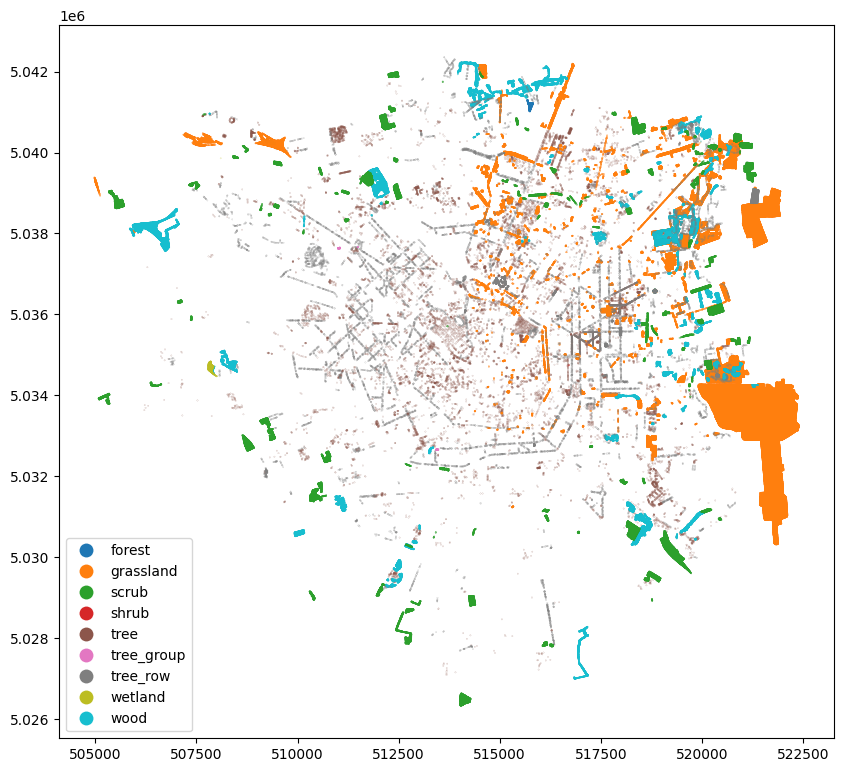

In [ ]:
gplot_milano(green_points, column = "natural", figsize=(10,10), markersize=0.01, legend=True)

<Axes: >

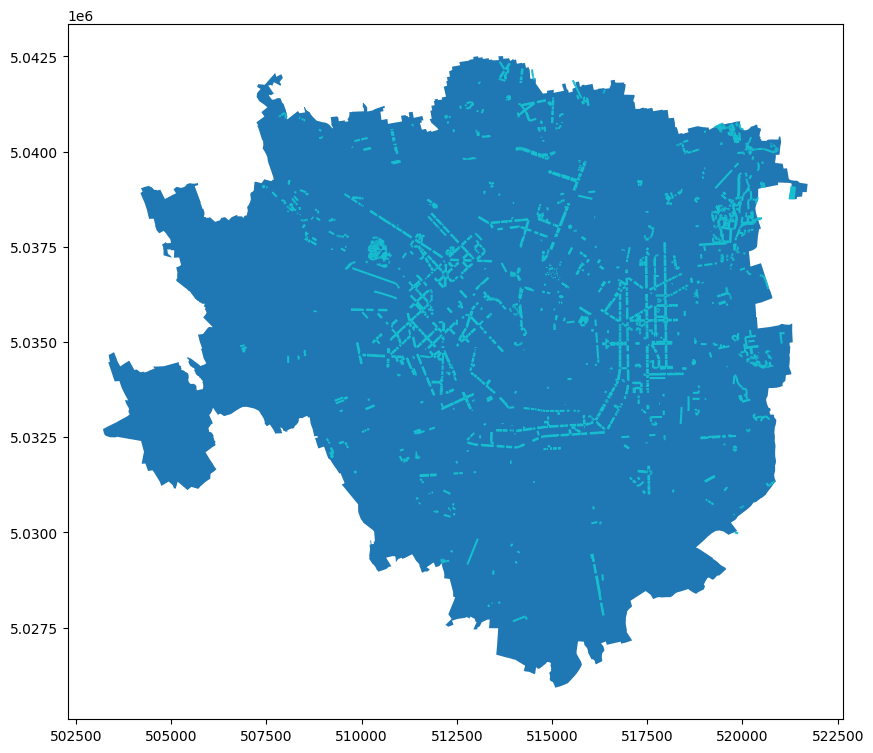

In [ ]:
gplot_milano(tree_rows, figsize=(10,10), markersize=0.01)

<Axes: >

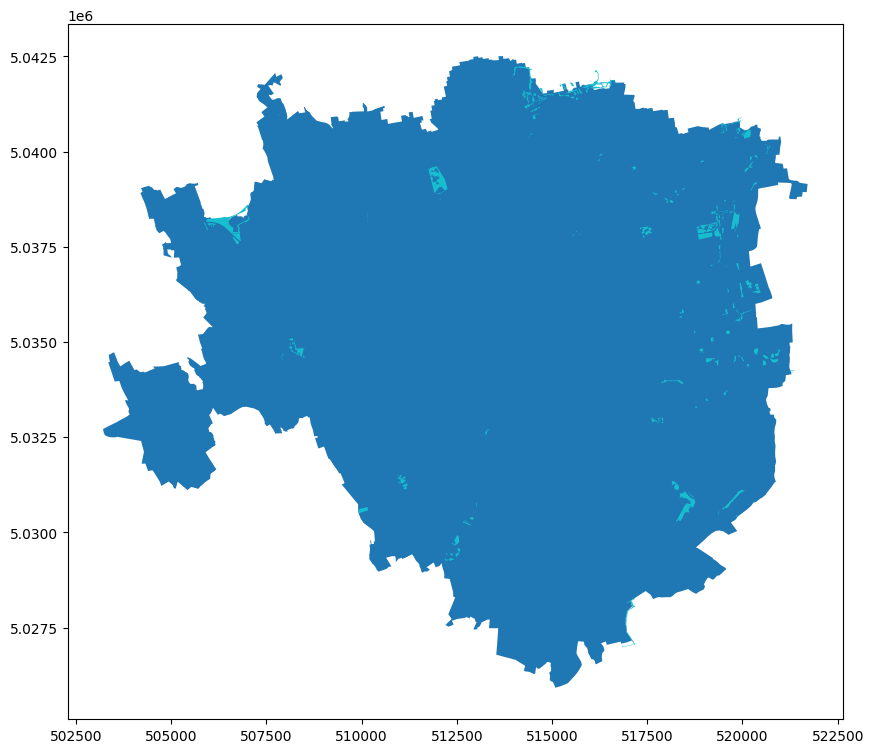

In [ ]:
gplot_milano(woods, figsize=(10,10), markersize=0.01)

per i poligoni e multipoligoni, io calcolerei l'area e dividerei poi il poligono in un numero di punti proporzionale all'area posti casualmente all'interno del poligono
esempio: parco nord ha un'area di 2km^2, allora avrò tanti punti classificati come grassland (tipo boh 2000) disposti casualmente all'interno della sua area.
l'aiuola piccolina sotto casa invece magari è 2mq quindi la posso considerare come un punto solo, un parchetto piccolino magari vale 100 punti etc
indicativamente magari un punto ogni 3mq, non so

In [ ]:
# Filtra le righe con NaN, 0.0 o None nelle colonne latitudine o longitudine
# eliminato isnull() perché è uguale a isna()
filtro = green_points['lat'].eq(0.0) | green_points['lat'].isna() | \
         green_points['lon'].eq(0.0) | green_points['lon'].isna()

# Applica il filtro al dataframe
righe_problematiche = green_points[filtro]

# Stampare le righe problematiche
print(righe_problematiche)

Empty GeoDataFrame
Columns: [natural, lon, lat, geometry, dataset]
Index: []


In [ ]:
from geopy.distance import distance
import numpy as np

# Distanza in metri
def calcola_distanza(punto1, punto2):
    return distance(punto1, punto2).meters

# Angolo in gradi
def calcola_angolo(point, reference):
  # point and reference are tuples (y, x) or (latitude, longitude)
  # must have the same CRS
  return np.arctan2(point[1] - reference[1], point[0] - reference[0]) * (180 / np.pi)

# Raggi in metri
# aggiungerei raggi più piccoli e diminuirei quelli più grossi
raggi = [100, 200, 500, 1000, 2000]

# da distanza a raggio
def calcola_raggio(distanza):
  for raggio in raggi:
    if distanza < raggio:
      return raggio
  return np.infty

settori = [1, 2, 3, 4, 5, 6, 7, 8]

# Divido gli angoli in 8
def calcola_settore(angolo):
    angolo_norm = angolo % 360
    settore = int(np.floor(angolo_norm / 45))  + 1
    return settore

In [ ]:
concatenated_stations

,id,name,geometry,dataset,latitudine,longitudine
0,#44216,Centro,POINT (514254.769 5034260.134),sc_chosen_stations,5.034260e+06,514254.768800
1,#40256,Porta Vittoria,POINT (516400.569 5034308.395),sc_chosen_stations,5.034308e+06,516400.568968
2,#32399,Via Meda,POINT (513926.824 5031844.054),sc_chosen_stations,5.031844e+06,513926.823619
3,#70169,Lodi,POINT (516599.959 5032086.080),sc_chosen_stations,5.032086e+06,516599.959025
4,#50128,Piazza Leonardo,POINT (517514.386 5036052.144),sc_chosen_stations,5.036052e+06,517514.386254
5,#32393,Via Ripamonti Fine,POINT (516145.039 5030310.204),sc_chosen_stations,5.030310e+06,516145.039236
6,#22851,Forlanini,POINT (518761.742 5034068.738),sc_chosen_stations,5.034069e+06,518761.742008
7,#24644,Villapizzone,POINT (511392.183 5038741.671),sc_chosen_stations,5.038742e+06,511392.183023
8,2,via Pascal *,POINT (518351.042 5035645.702),stations_milano,5.035646e+06,518351.042247
9,3,viale Liguria,POINT (513250.896 5032311.124),stations_milano,5.032311e+06,513250.895801


In [ ]:
# Genera punti per milano

def frange(start, stop, step):
    res, n = start, 1
    while res < stop:
        yield res
        res = start + n * step
        n += 1

def grid_points_in_polygon(polygon, width, height):
    min_x, min_y, max_x, max_y = polygon.bounds
    points = []
    widths = list(frange(min_x, max_x, (max_x-min_x) / width))
    heights = list(frange(min_y, max_y, (max_y-min_y) / height))
    for i in widths:
      for j in heights:
        p = Point(i, j)
        if polygon.contains(p):
            points.append(p)
    return points

milano_points = pd.DataFrame({"geometry": grid_points_in_polygon(milano, 300, 300)})
milano_points = gpd.GeoDataFrame(milano_points, crs = comune.crs)
milano_points["dataset"] = "milano_points"
gplot_milano(milano_points, figsize=(10,10), markersize=0.02)

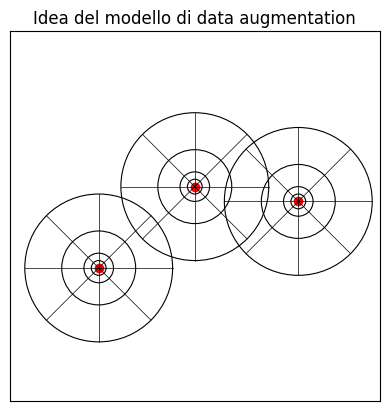

Centri dei cerchi: [(0, 4), (14, 2), (-13, -7)]


In [ ]:
# Definisci i raggi
radii = [1, 2, 5, 10]

random.seed(40)

center1 = (random.randint(-14, 14), random.randint(-14, 14))
center2 = (random.randint(-14, 14), random.randint(-14, 14))
center3 = (random.randint(-14, 14), random.randint(-14, 14))

# Unisci i centri in una lista
centers = [center1, center2, center3]

# Angoli in radianti ogni 45 gradi, partendo da est (0 gradi) in senso antiorario
angles = np.deg2rad(np.arange(0, 360, 45))

# Crea una figura e un set di assi
fig, ax = plt.subplots()

# Disegna i cerchi concentrici per ciascun centro
for center in centers:
    for radius in radii:
        circle = plt.Circle(center, radius, fill=False, linewidth=0.8)
        ax.add_patch(circle)
    # Colora i centri in rosso
    ax.plot(center[0], center[1], 'ro')

    # Disegna le linee radiali ogni 45 gradi
    for angle in angles:
        x_end = center[0] + radii[-1] * np.cos(angle)
        y_end = center[1] + radii[-1] * np.sin(angle)
        ax.plot([center[0], x_end], [center[1], y_end], 'k-', linewidth=0.5)

# Imposta le proporzioni degli assi in modo che i cerchi siano proporzionati
ax.set_aspect('equal')

# Imposta i limiti degli assi per garantire che tutti i cerchi siano visibili
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)

ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
plt.title("Idea del modello di data augmentation")
plt.show()

# Stampa i centri per riferimento
print("Centri dei cerchi:", centers)

In [ ]:
def divide_in_areas(stazione_geometry, gdf):
  return_gdf = gdf.copy()
  return_gdf["distance"] = return_gdf["geometry"].apply(lambda x: gpd.GeoSeries([x.centroid], crs="epsg:32632").distance(stazione_geometry))
  return_gdf["raggio"] = return_gdf["distance"].apply(calcola_raggio).astype(str)
  # Calcolo dell'angolo rispetto alla direzione dell'est per ciascun albero
  # x is longitude
  # y is latitude
  return_gdf["angolo"] = np.arctan2(return_gdf.centroid.x - stazione_geometry.x, return_gdf.centroid.y - stazione_geometry.y) * (180 / np.pi)
  return_gdf["settore"] = return_gdf["angolo"].apply(calcola_settore).astype(str)
  return_gdf["area"] = "-"
  return_gdf["area"] = return_gdf["raggio"] + return_gdf["area"] + return_gdf["settore"]
  return return_gdf

<Axes: >

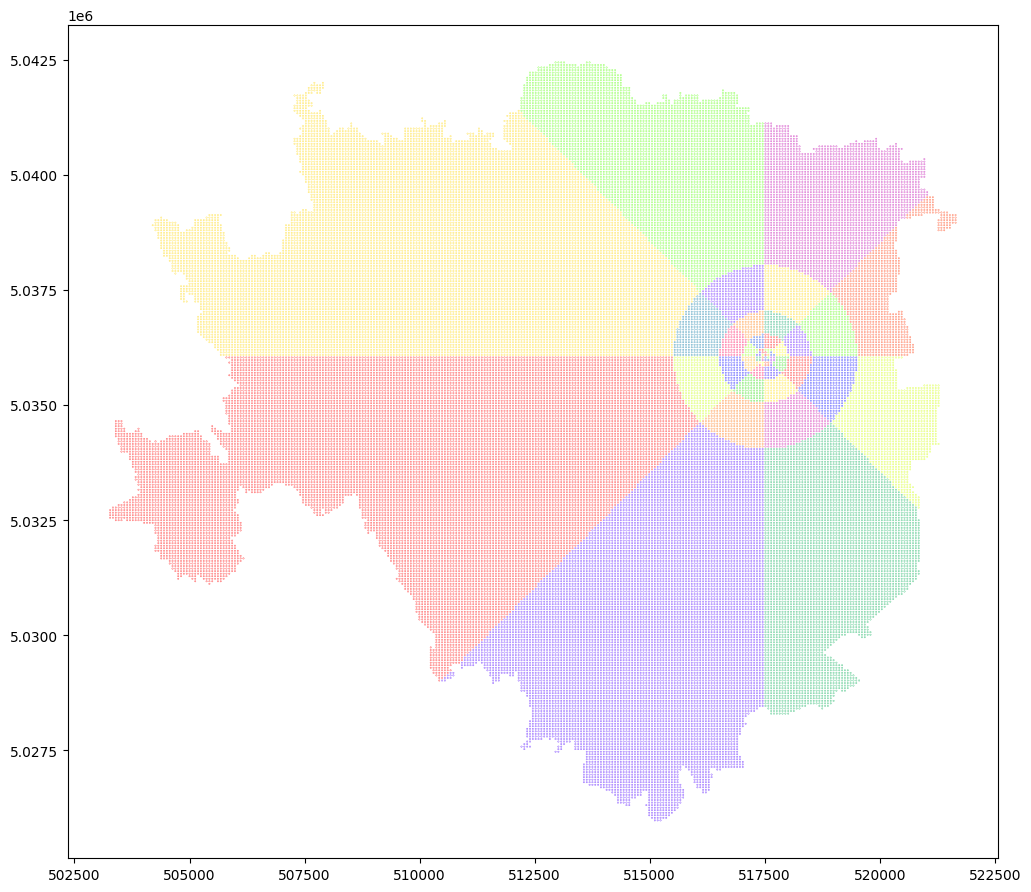

In [ ]:
gplot_milano(
    divide_in_areas(concatenated_stations[concatenated_stations["name"] == "Piazza Leonardo"].geometry.iloc[0], milano_points),
    column = "area",
    cmap = "prism",
    figsize=(12,12),
    markersize=0.04,
)

In [ ]:
green_points.shape

(788512, 5)

In [ ]:
tmp = divide_in_areas(concatenated_stations[concatenated_stations["name"] == "Piazza Leonardo"].geometry.iloc[0], green_points)

tmp["area"].value_counts()

area
inf-3       316313
inf-2        98093
inf-4        84525
inf-1        83755
inf-7        74365
inf-8        47210
inf-6        33623
inf-5        23280
2000.0-3      5127
2000.0-2      3942
2000.0-8      2324
2000.0-6      2234
2000.0-1      1604
2000.0-5      1540
1000.0-3      1258
1000.0-5      1155
2000.0-4      1126
2000.0-7      1122
500.0-2        939
1000.0-2       681
500.0-3        581
1000.0-4       564
200.0-2        539
1000.0-6       395
1000.0-1       384
200.0-3        284
1000.0-7       254
500.0-7        207
500.0-8        174
500.0-5        166
1000.0-8       158
100.0-2        147
500.0-1        133
100.0-1        122
500.0-4         58
100.0-8         30
100.0-3         19
200.0-4         18
200.0-1         16
200.0-8         15
100.0-5         11
500.0-6          9
200.0-5          8
100.0-4          3
100.0-6          1
Name: count, dtype: int64

<Axes: >

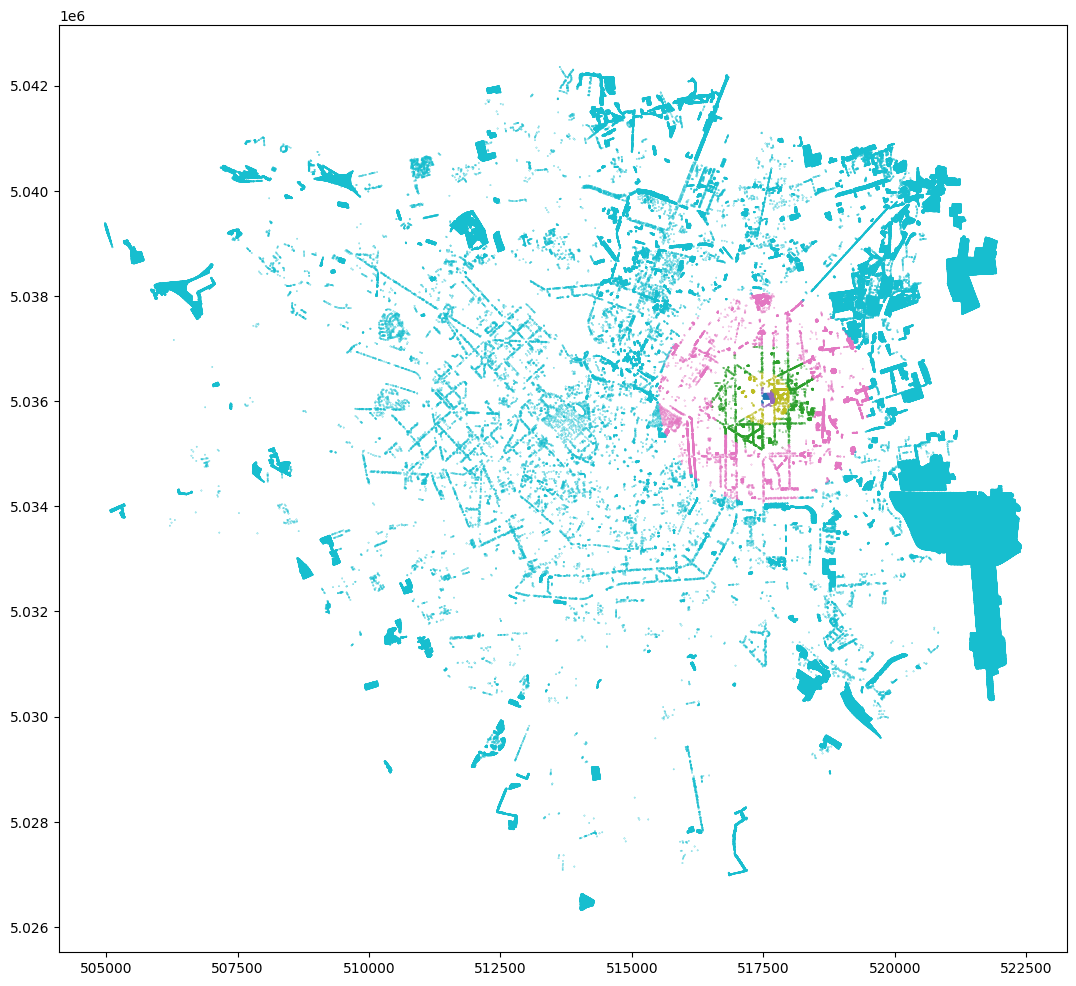

In [ ]:
gplot_milano(tmp, column = "raggio", figsize=(13,13), markersize=0.05)

<Axes: >

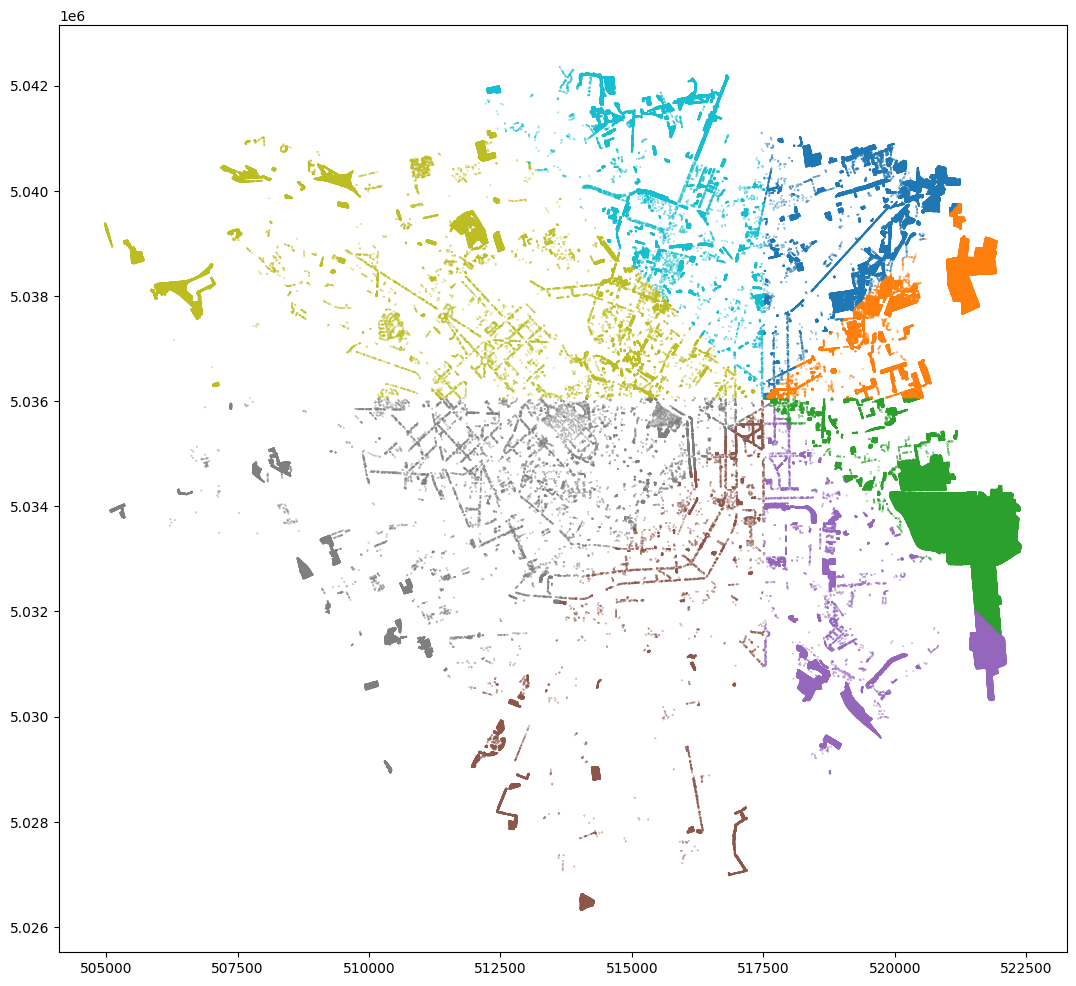

In [ ]:
gplot_milano(tmp, column = "settore", figsize=(13,13), markersize=0.05)

<Axes: >

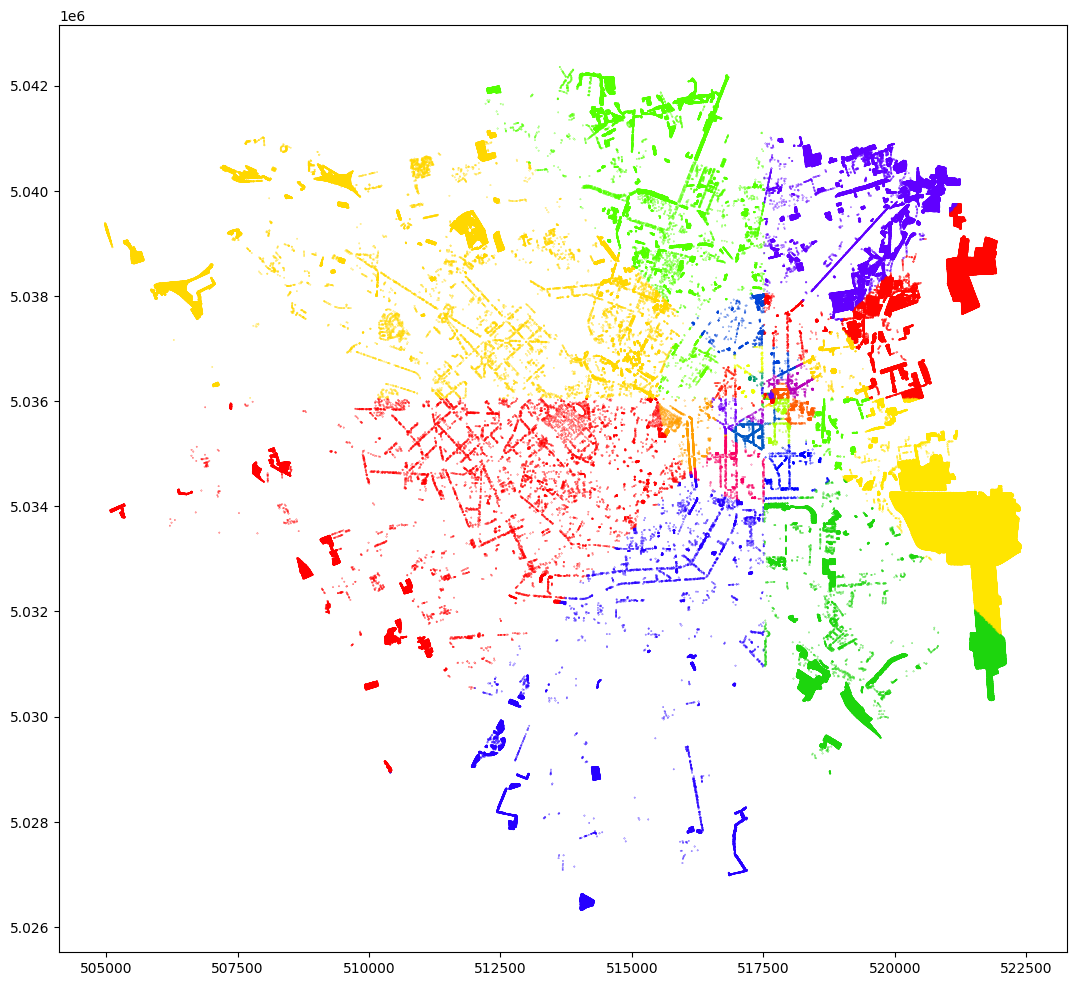

In [ ]:
gplot_milano(tmp, column = "area", figsize=(13,13), markersize=0.05, cmap = "prism")

In [ ]:
# Calcolo delle distanze e divisione per settori per ogni stazione
colonne = ['natural', 'geometry', 'distance', 'raggio', 'angolo', 'settore', 'area']
risultati = gpd.GeoDataFrame(columns=['stazione'] + colonne, crs = "EPSG:32632")
for idx, stazione in concatenated_stations.iterrows():
    tmp = divide_in_areas(stazione.geometry, green_points)
    tmp = tmp[colonne]
    tmp['stazione'] = stazione['id']
    risultati = gpd.GeoDataFrame(pd.concat([risultati, tmp]), crs = "EPSG:32632")
risultati

In [ ]:
risultati_centro = risultati[risultati['stazione']=='Centro']
risultati_centro

# Export data

In [ ]:
file_path = os.path.join(CSV_AND_JSON_FOLDER, 'green_points.feather')
green_points.to_feather(file_path, index=False)

In [ ]:
file_path = os.path.join(CSV_AND_JSON_FOLDER, 'green_divided_in_areas.feather')
risultati.to_feather(file_path, index=False)